# Titanic Dataset

### Import Libraries

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import joblib
import pickle
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df = pd.read_csv("../data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Eploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- There are total of 891 rows and 12 columns
- Out of 12 columns, 5 are int type, 5 are object type and 2 have float data type

In [6]:
for col in df.describe(include='object'):
    print(col, len(df[col].unique()), df[col].unique())

Name 891 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"

In [7]:
df.duplicated().sum()

0

- No duplicate rows

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age has 177 rows missing
- Cabin has 687 rows missing
- Embarked has 2 rows missing

- We can exclude PassengerId, Name and Ticket safetly since they donot depend on survival chances
- Cabin might depend on survival chances, but since more than 75% of passengers have no cabin information, we should exclude it from our training dataset

In [9]:
# Dropping columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<Axes: xlabel='Survived'>

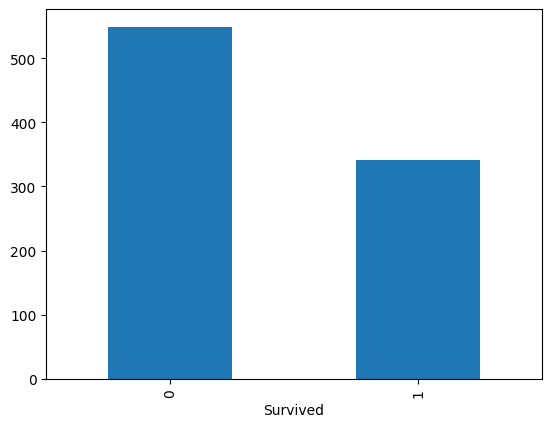

In [10]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Embarked', ylabel='Survived'>

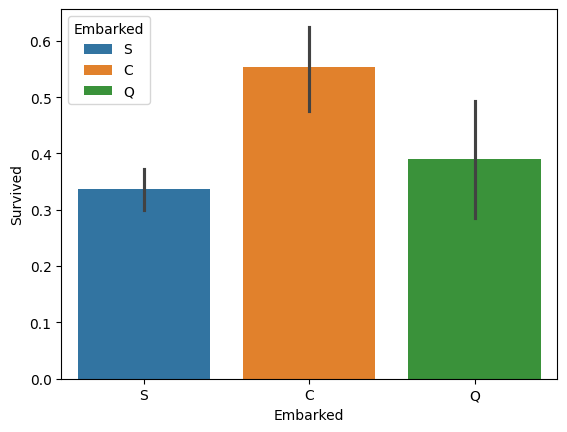

In [11]:
sns.barplot(df, x='Embarked', y='Survived', hue='Embarked')

- Passengers that embarked from Cherbourg survived the most

<Axes: xlabel='Survived', ylabel='Fare'>

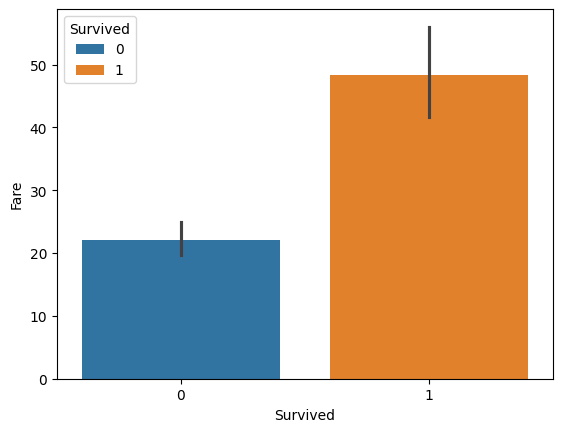

In [12]:
sns.barplot(df, x='Survived', y='Fare', hue='Survived')

<Axes: xlabel='Age', ylabel='Survived'>

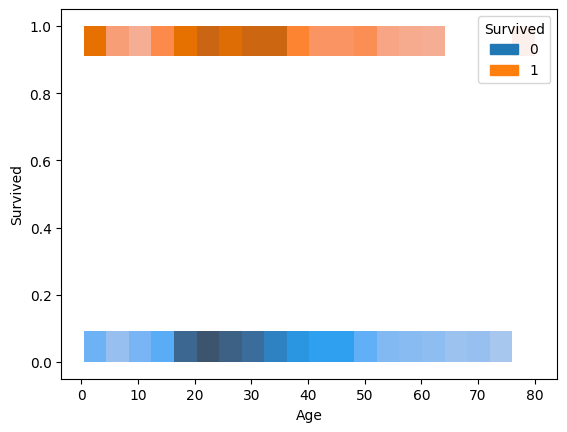

In [13]:
sns.histplot(df, x='Age', y='Survived', hue='Survived')

### One-Hot Encoding

We will be One-Hot Encoding Sex and Embarked features

In [14]:
oh_encoded_features = pd.get_dummies(df[['Sex', 'Embarked']], dtype='int')
oh_encoded_features

df_encoded = pd.concat([df, oh_encoded_features], axis=1)
df_encoded = df_encoded.drop(columns=['Sex', 'Embarked'], axis=1)

### Imputing Age data

We will be using RandomForestRegressor to calculate the missing age of passengers based on their features

In [15]:
X = df_encoded[~df['Age'].isnull()].drop(columns=['Age'])
y = df_encoded[~df['Age'].isnull()]['Age']

regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1)
regressor.fit(X, y)

RandomForestRegressor(n_jobs=-1)

In [16]:
# Calculating Metrics
predictions = regressor.predict(X)
mse = mean_squared_error(y, predictions) 
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 56.57574766408446
R-squared: 0.7315167684118646


In [17]:
# Predicting and imputing age to the dataset
age_predicted = regressor.predict(df_encoded[df['Age'].isnull()].drop(columns=['Age']))
df_encoded.loc[df['Age'].isnull(), 'Age'] = age_predicted

### Correlation Analysis

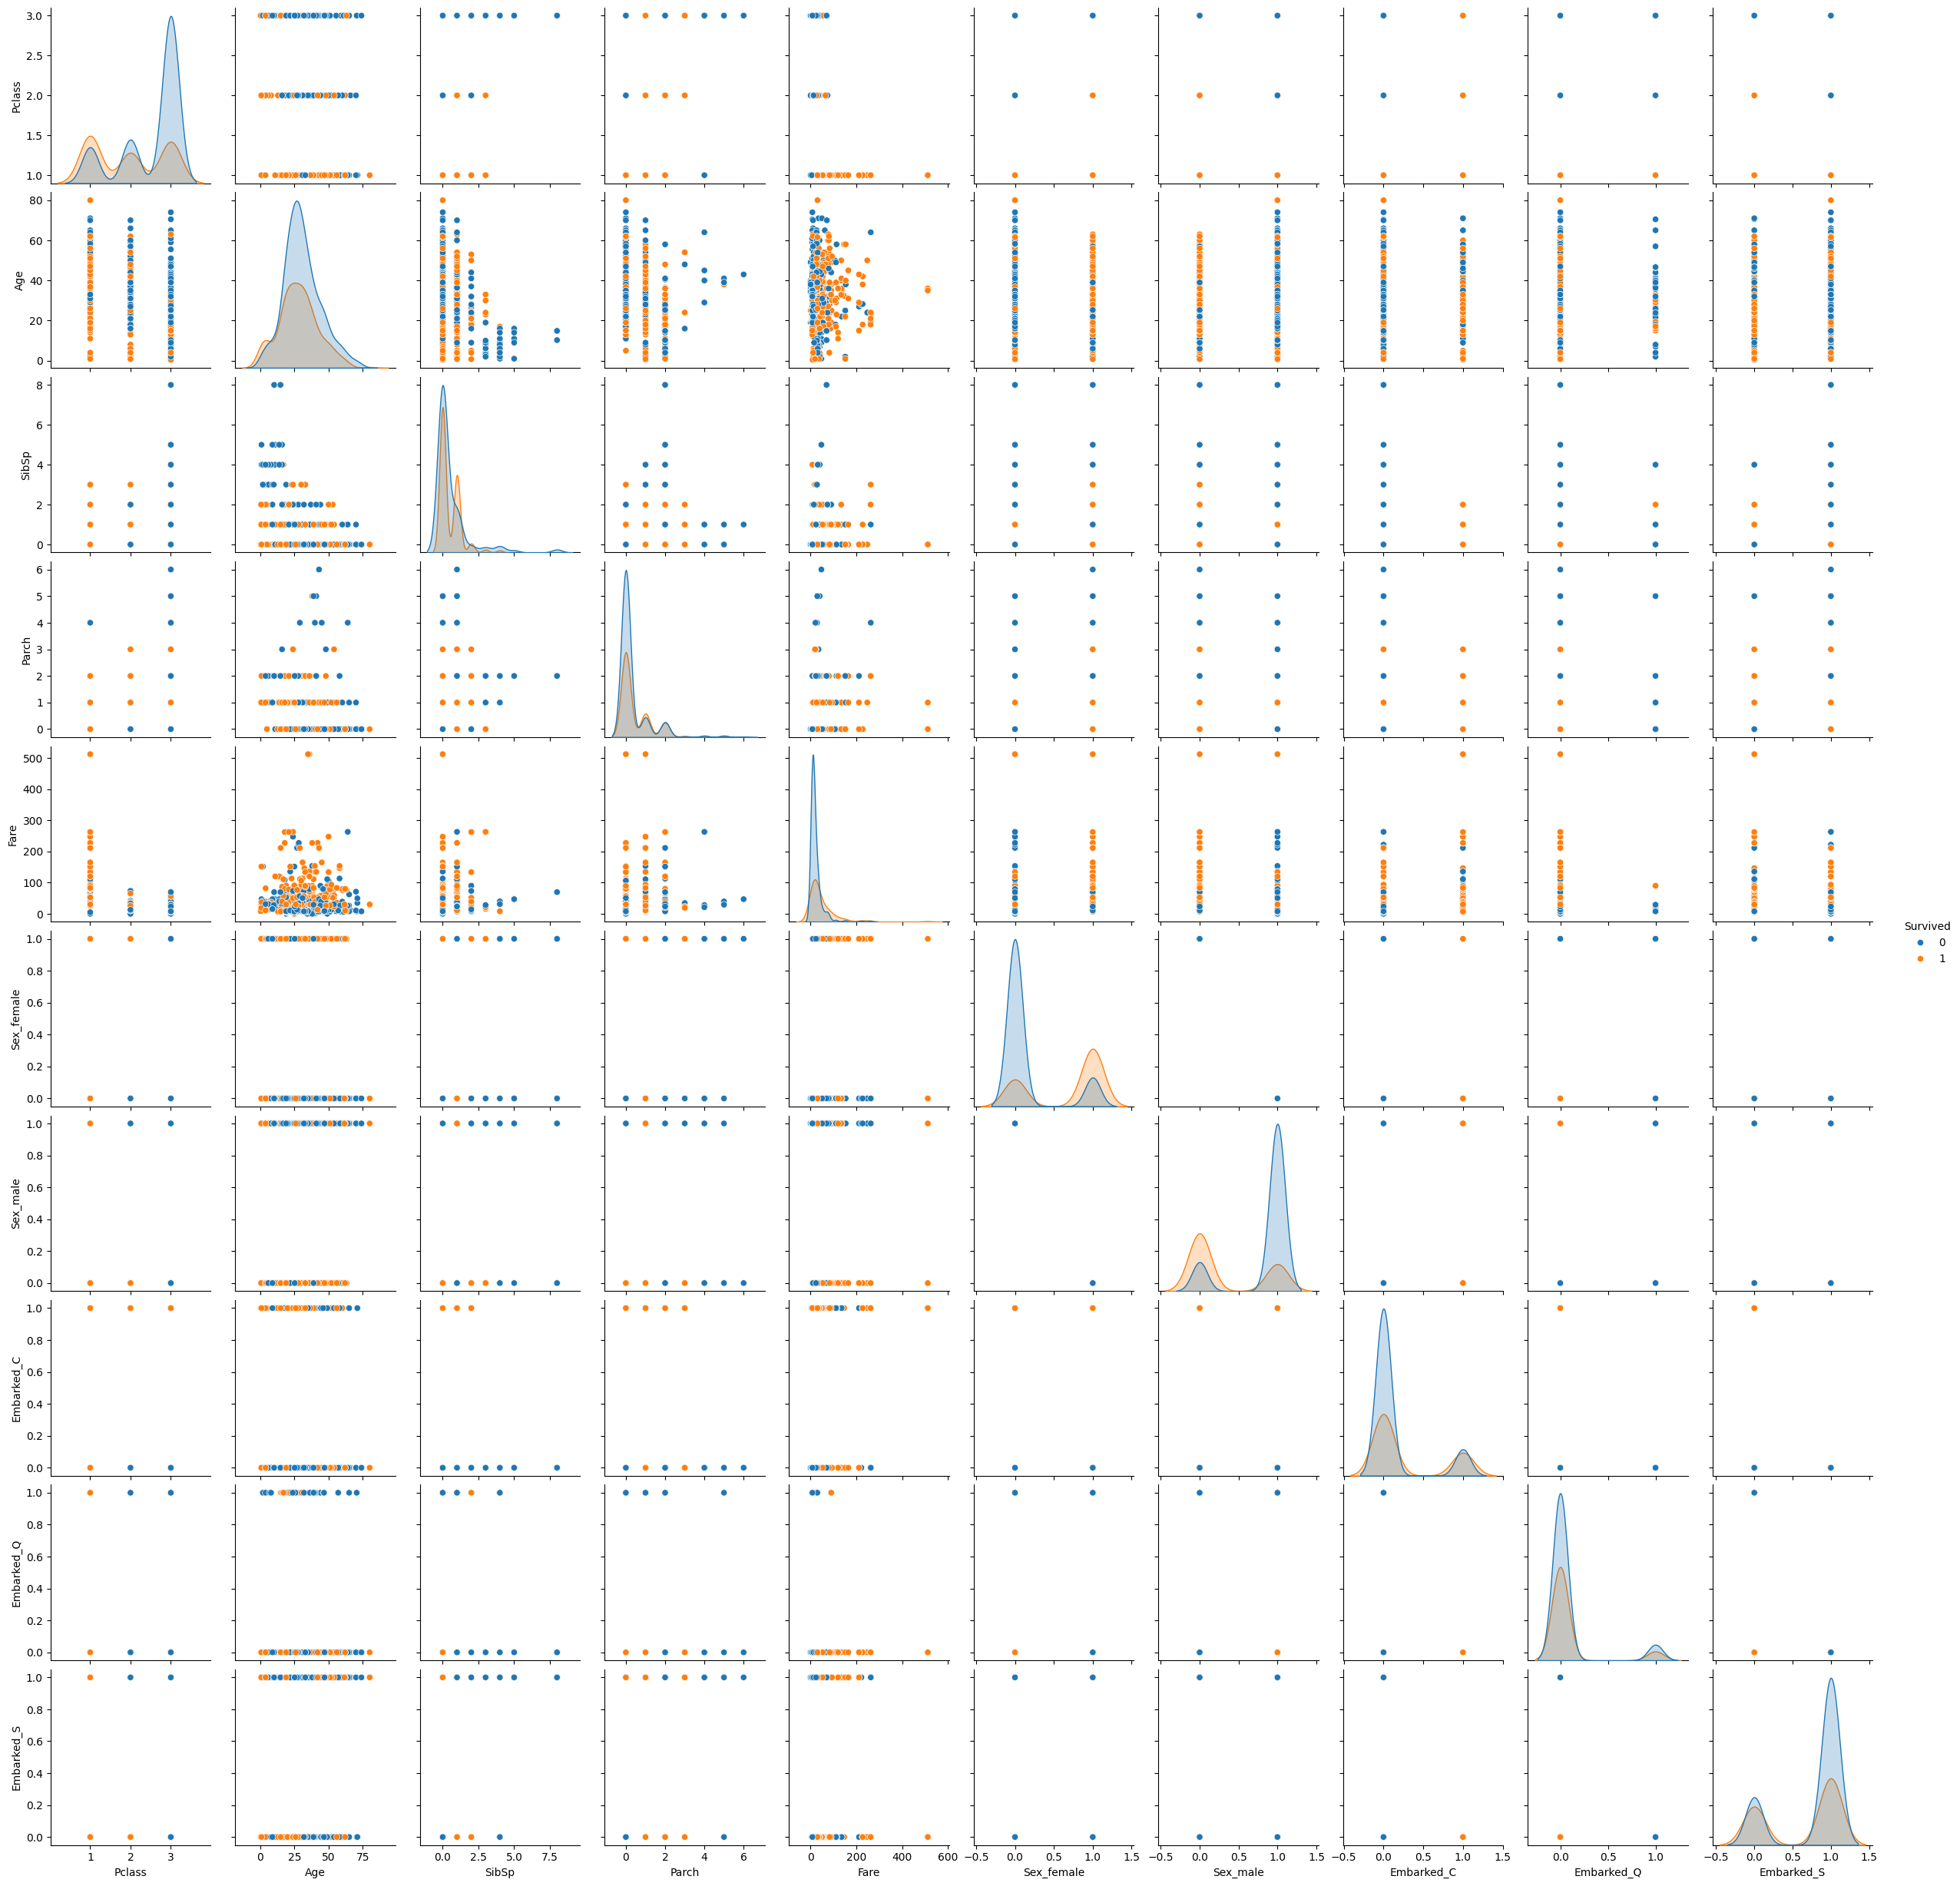

In [18]:
sns.pairplot(df_encoded, hue='Survived')

In [19]:
df_encoded.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.099312,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.386589,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.099312,-0.386589,1.000000,-0.316711,-0.212735,0.085133,-0.146003,0.146003,0.021464,-0.022322,-0.012127
SibSp,-0.035322,0.083081,-0.316711,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.212735,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.085133,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.146003,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.146003,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.021464,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.022322,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


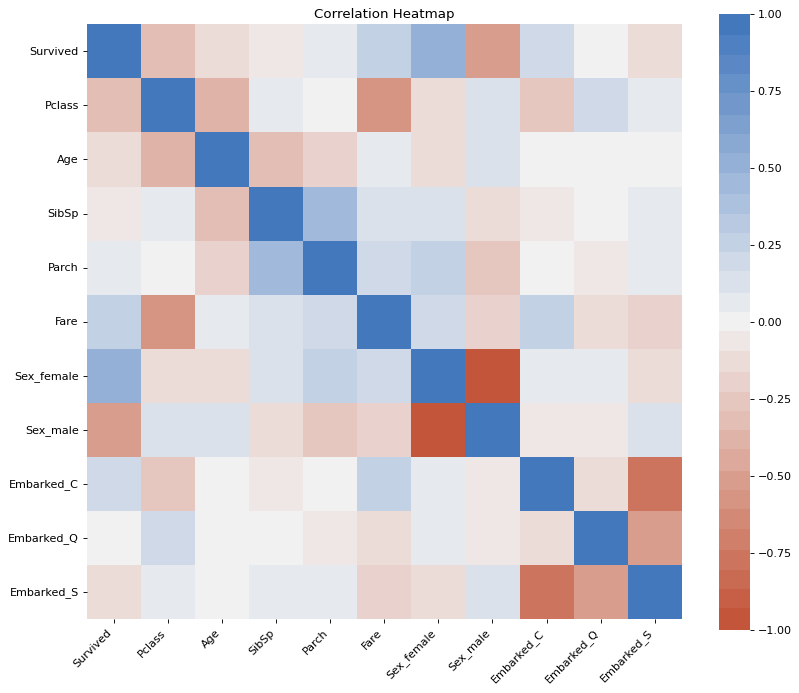

In [20]:
plt.figure(figsize=(12, 10), dpi=80)
plt.title("Correlation Heatmap")

hm = sns.heatmap(df_encoded.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 251, n=31), square=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### VIF Analysis

In [21]:
df_2 = df_encoded.copy()

In [22]:
vif_df = pd.DataFrame()
vif_df["feature"] = df_2.columns
vif_df["vif"] = [variance_inflation_factor(df_2.values, i) for i in range(df_2.shape[1])]

vif_df

,feature,vif
0,Survived,1.687342
1,Pclass,2.057890
2,Age,1.447109
3,SibSp,1.349815
4,Parch,1.332104
5,Fare,1.654329
6,Sex_female,175.108143
7,Sex_male,321.900799
8,Embarked_C,69.671555
9,Embarked_Q,36.670833


- Sex and Embarked have high vif due to one-hot encoding of these features. This can be ignored.

### Split Data

In [23]:
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Logistic Regression

In [24]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = logistic_model.predict(X_test)
print("Score: ", logistic_model.score(X_test, y_test))
print("AUC ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score:  0.8268156424581006
AUC  0.8062400635930048
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



<Axes: >

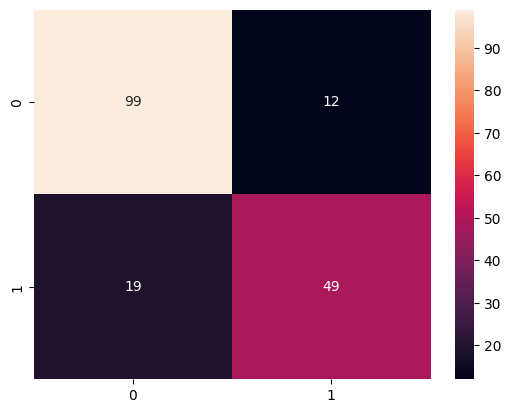

In [26]:
sns.heatmap(confusion_matrix(y_test, logistic_model.predict(X_test)), annot=True)

### RandomForest Classifier

In [30]:
param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250, 300], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 12, 15], 
    'max_leaf_nodes': [3, 6, 9, 12, 15], 
}


random_forest_model = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=param_grid, verbose=10)
random_forest_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200
[CV 1/5; 1/10] END max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200;, score=0.748 total time=   0.4s
[CV 2/5; 1/10] START max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200
[CV 2/5; 1/10] END max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200;, score=0.797 total time=   0.3s
[CV 3/5; 1/10] START max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200
[CV 3/5; 1/10] END max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200;, score=0.761 total time=   0.4s
[CV 4/5; 1/10] START max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200
[CV 4/5; 1/10] END max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200;, score=0.845 total time=   0.4s
[CV 5/5; 1/10] START max_depth=6, max_features=sqrt, max_leaf_nodes=3, n_estimators=200
[CV 5/5; 1/10] END max_

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 6, 9, 12, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9, 12, 15],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   verbose=10)

In [31]:
print(random_forest_model.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=15, n_estimators=200)


In [32]:
y_pred = random_forest_model.predict(X_test)
print("Score: ", random_forest_model.score(X_test, y_test))
print("AUC ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score:  0.8491620111731844
AUC  0.8071674615792263
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       111
           1       0.96      0.63      0.76        68

    accuracy                           0.85       179
   macro avg       0.88      0.81      0.83       179
weighted avg       0.87      0.85      0.84       179



<Axes: >

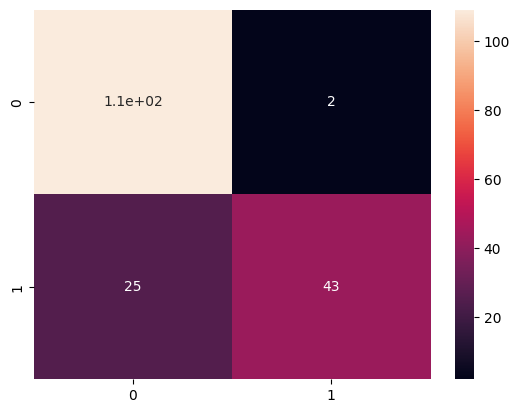

In [33]:
sns.heatmap(confusion_matrix(y_test, random_forest_model.predict(X_test)), annot=True)

### AdaBoost Classifier

In [42]:
param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250, 300], 
}

adaboost_model = GridSearchCV(AdaBoostClassifier(), 
                           param_grid=param_grid, verbose=10)
adaboost_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=50.............................................
[CV 1/5; 1/6] END ..............n_estimators=50;, score=0.769 total time=   0.1s
[CV 2/5; 1/6] START n_estimators=50.............................................
[CV 2/5; 1/6] END ..............n_estimators=50;, score=0.811 total time=   0.1s
[CV 3/5; 1/6] START n_estimators=50.............................................
[CV 3/5; 1/6] END ..............n_estimators=50;, score=0.831 total time=   0.1s
[CV 4/5; 1/6] START n_estimators=50.............................................
[CV 4/5; 1/6] END ..............n_estimators=50;, score=0.859 total time=   0.1s
[CV 5/5; 1/6] START n_estimators=50.............................................
[CV 5/5; 1/6] END ..............n_estimators=50;, score=0.739 total time=   0.0s
[CV 1/5; 2/6] START n_estimators=100............................................
[CV 1/5; 2/6] END .............n_estimators=100;,

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=10)

In [38]:
print(adaboost_model.best_estimator_)

AdaBoostClassifier()


In [39]:
y_pred = adaboost_model.predict(X_test)
print("Score: ", adaboost_model.score(X_test, y_test))
print("AUC ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score:  0.8324022346368715
AUC  0.8135930047694754
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.81      0.74      0.77        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



<Axes: >

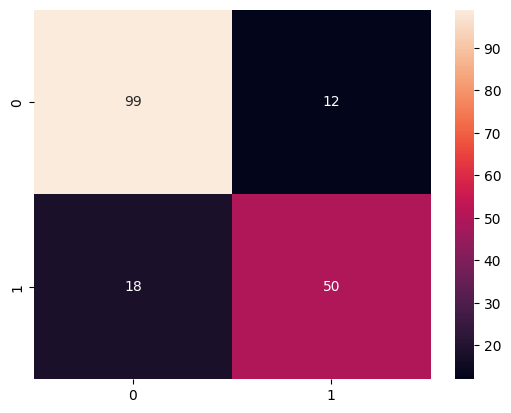

In [40]:
sns.heatmap(confusion_matrix(y_test, adaboost_model.predict(X_test)), annot=True)

### GradienBoost Classifier

In [61]:
param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250, 300], 
}

gb_model = GridSearchCV(GradientBoostingClassifier(), 
                           param_grid=param_grid, verbose=10)
gb_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START n_estimators=50.............................................
[CV 1/5; 1/6] END ..............n_estimators=50;, score=0.804 total time=   0.0s
[CV 2/5; 1/6] START n_estimators=50.............................................
[CV 2/5; 1/6] END ..............n_estimators=50;, score=0.832 total time=   0.0s
[CV 3/5; 1/6] START n_estimators=50.............................................
[CV 3/5; 1/6] END ..............n_estimators=50;, score=0.803 total time=   0.0s
[CV 4/5; 1/6] START n_estimators=50.............................................
[CV 4/5; 1/6] END ..............n_estimators=50;, score=0.859 total time=   0.1s
[CV 5/5; 1/6] START n_estimators=50.............................................
[CV 5/5; 1/6] END ..............n_estimators=50;, score=0.746 total time=   0.0s
[CV 1/5; 2/6] START n_estimators=100............................................
[CV 1/5; 2/6] END .............n_estimators=100;,

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=10)

In [60]:
y_pred = gb_model.predict(X_test)
print("Score: ", gb_model.score(X_test, y_test))
print("AUC ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score:  0.8379888268156425
AUC  0.8095521992580816
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       111
           1       0.85      0.69      0.76        68

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



<Axes: >

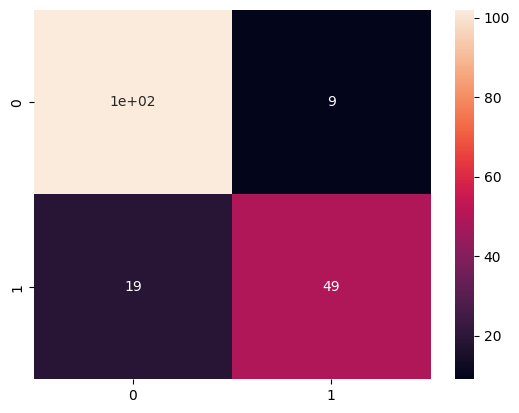

In [45]:
sns.heatmap(confusion_matrix(y_test, gb_model.predict(X_test)), annot=True)

In [ ]:
tf_random_forest_model = tfdf.keras.RandomForestModel(verbose=2)
tf_random_forest_model.fit(X_train)

In [ ]:
self_evaluation = model.make_inspector().evaluation()
print(f"Accuracy: {self_evaluation.accuracy} Loss:{self_evaluation.loss}")

In [ ]:
tf_gb_model = tfdf.keras.Gradi(verbose=2)
tf_gb_model.fit(X_train)

### Evaluating Models

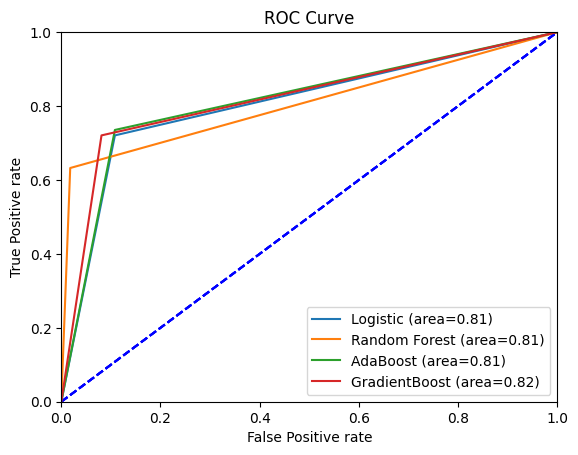

In [46]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

models = [(logistic_model, 'Logistic'), (random_forest_model, 'Random Forest'), (adaboost_model, 'AdaBoost'), (gb_model, 'GradientBoost')]
for (model,name) in models:
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

    plt.plot([0,1], [0,1], 'b--')
    plt.plot(fpr, tpr, label=f'{name} (area=%0.2f)' % logit_roc_auc)

plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Feature Importance

<BarContainer object of 10 artists>

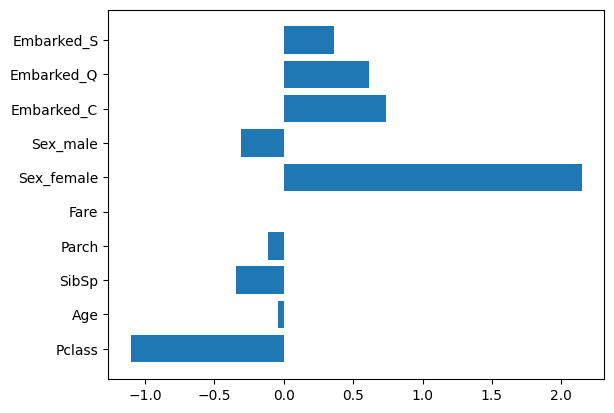

In [47]:
coeffs = logistic_model.coef_ 
plt.barh(X.columns, coeffs[0])

### Save Models

In [ ]:
with open("../output/df_encoded.pkl", 'wb') as f:
    pickle.dump(df_encoded, f)

In [ ]:
joblib.dump(logistic_model, '../output/logistic.sav')

In [ ]:
joblib.dump(random_forest_model, '../output/randomforest.sav')

In [ ]:
joblib.dump(adaboost_model, '../output/adaboost.sav')

In [ ]:
joblib.dump(gb_model, '../output/gbmodel.sav')

### Testing Dataset

##### Train on the complete training dataset

In [48]:
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

gb_model = GradientBoostingClassifier()
gb_model.fit(X, y)

GradientBoostingClassifier()

In [49]:
df_test = pd.read_csv("../data/test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [50]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [51]:
df_test_passengerIds = df_test['PassengerId']

In [52]:
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [53]:
oh_test_encoded_features = pd.get_dummies(df_test[["Sex", "Embarked"]], dtype="int")

data_test_encoded = pd.concat([df_test, oh_test_encoded_features], axis=1)
data_test_encoded = data_test_encoded.drop(columns=["Sex", "Embarked"], axis=1)

data_test_encoded = data_test_encoded.reindex(
    columns=[
        "Pclass",
        "Age",
        "SibSp",
        "Parch",
        "Fare",
        "Sex_female",
        "Sex_male",
        "Embarked_C",
        "Embarked_Q",
        "Embarked_S",
    ],
    fill_value=0,
)

In [54]:
X_test_encoded = data_test_encoded[~data_test_encoded['Fare'].isnull()].drop(columns=['Fare'])
y_test_encoded = data_test_encoded[~data_test_encoded['Fare'].isnull()]['Fare']

regressor_test = RandomForestRegressor(n_estimators=200, n_jobs=-1)
regressor_test.fit(X_test_encoded, y_test_encoded)

fare_predicted_test = regressor_test.predict(data_test_encoded[data_test_encoded['Fare'].isnull()].drop(columns=['Fare']))
data_test_encoded.loc[data_test_encoded['Fare'].isnull(), 'Fare'] = fare_predicted_test

In [55]:
X_test_encoded = data_test_encoded[~data_test_encoded['Age'].isnull()].drop(columns=['Age'])
y_test_encoded = data_test_encoded[~data_test_encoded['Age'].isnull()]['Age']

regressor_test = RandomForestRegressor(n_estimators=200, n_jobs=-1)
regressor_test.fit(X_test_encoded, y_test_encoded)

# Predicting and imputing age to the dataset
age_predicted_test = regressor_test.predict(data_test_encoded[data_test_encoded['Age'].isnull()].drop(columns=['Age']))
data_test_encoded.loc[data_test_encoded['Age'].isnull(), 'Age'] = age_predicted_test

In [56]:
data_test_pred = gb_model.predict(data_test_encoded)
data_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
test_output_df = pd.DataFrame({'PassengerId': df_test_passengerIds, 'Survived': data_test_pred})
test_output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [58]:
test_output_df.to_csv('../output/submission2.csv', index=False)